In [1]:
import torch
import torchvision

In [2]:
output_dim = 1024

In [3]:
model = torchvision.models.resnet50(pretrained=True)

/home/werkaj/Desktop/ensembleAI-2025/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/werkaj/Desktop/ensembleAI-2025/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
model.conv1 = torch.nn.Conv2d(3, 64, kernel_size = 3, stride=1, padding=1, bias=False)
model.maxpool = torch.nn.Identity()
model.fc = torch.nn.Linear(2048, output_dim)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentu

In [5]:
from example_submission import TaskDataset

In [34]:
torch.serialization.safe_globals([TaskDataset])

In [36]:
data = torch.load("ModelStealingPub.pt", weights_only=False)
print(data)

In [37]:
import torchvision.transforms as transforms

data_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize([0.2980, 0.2962, 0.2987], [0.2886, 0.2875, 0.2889])
])

In [8]:
data.transform = data_transforms

In [9]:
data

In [10]:
data.transform

Compose(
    ToTensor()
    Normalize(mean=[0.298, 0.2962, 0.2987], std=[0.2886, 0.2875, 0.2889])
)

In [11]:
BATCH_SIZE = 32
data_loader = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE, shuffle=True)

In [13]:
for batch in data_loader:
    print(batch)

RuntimeError: output with shape [1, 32, 32] doesn't match the broadcast shape [3, 32, 32]

In [14]:
print(data.imgs[0].shape) 

AttributeError: 'Image' object has no attribute 'shape'

In [15]:
pic = data.imgs[0]

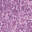

In [16]:
pic

In [19]:
pic = data.imgs[1]

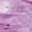

In [20]:
pic

In [24]:
pic = data.__getitem__(0)[1]

In [25]:
pic.shape

torch.Size([3, 32, 32])

In [26]:
pic

tensor([[[1.3046, 1.0328, 1.2503,  ..., 1.1551, 0.9649, 1.0057],
         [1.1280, 1.1415, 1.6171,  ..., 1.3454, 1.4813, 1.8210],
         [1.2095, 1.1959, 1.4405,  ..., 1.7123, 1.8617, 1.6715],
         ...,
         [1.4948, 1.4813, 1.2638,  ..., 1.6987, 1.5220, 1.1687],
         [1.2638, 1.4948, 1.3182,  ..., 1.6987, 1.2095, 1.1008],
         [1.3725, 1.7394, 1.4133,  ..., 1.3997, 1.2231, 1.0600]],

        [[0.6338, 0.3747, 0.6611,  ..., 0.4156, 0.2792, 0.3610],
         [0.4292, 0.4838, 1.0840,  ..., 0.6066, 0.8657, 1.3431],
         [0.4974, 0.4974, 0.8248,  ..., 1.0158, 1.2477, 1.0567],
         ...,
         [0.9203, 0.8248, 0.5520,  ..., 1.0567, 0.9203, 0.4974],
         [0.5384, 0.7839, 0.5656,  ..., 1.0567, 0.4974, 0.3474],
         [0.7430, 1.1249, 0.6748,  ..., 0.6884, 0.4838, 0.1974]],

        [[1.2465, 1.0565, 1.2737,  ..., 1.0972, 0.9479, 1.0293],
         [1.0972, 1.1515, 1.5587,  ..., 1.2465, 1.4094, 1.7352],
         [1.1244, 1.1379, 1.3823,  ..., 1.5044, 1.6673, 1.